In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [23]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [24]:
x=df_train.values[:,1:]
# print(x[0])
y=x.reshape(42000,28,28,1)
# print(y[0])

In [ ]:
x

In [8]:
img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [9]:
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

x, y = data_prep(df_train)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Epoch 1/2
263/263 [==============================] - 67s 254ms/step - loss: 0.2293 - accuracy: 0.9336 - val_loss: 0.0838 - val_accuracy: 0.9739
Epoch 2/2
263/263 [==============================] - 42s 159ms/step - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0560 - val_accuracy: 0.9826


In [10]:
df_test.shape[0]

28000

In [11]:
test_as_array = df_test.values[:,:]
test_shaped_array = test_as_array.reshape(28000,28, 28, 1)
final_test = test_shaped_array / 255

In [12]:
y_predicted = model.predict(final_test)
y_predicted.shape

(28000, 10)

In [13]:
ans_pred = [np.argmax(i) for i in y_predicted]

In [14]:
len(ans_pred)

28000

In [15]:
imageid=[x for x in range (1,28001)]

In [16]:
data = {'ImageId':list(imageid),
        'Label':list(ans_pred)}
 
# Create DataFrame
answer = pd.DataFrame(data)
answer

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [17]:
answer.to_csv('submission.csv',index=False)

In [21]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Showing the first row**

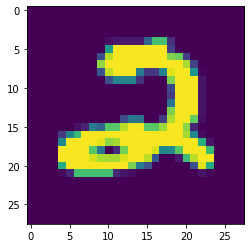

In [68]:
x=df_test[:1]
x=x.to_numpy()
x=x.reshape((28, 28))
from matplotlib import pyplot as plt
plt.imshow(x, interpolation='nearest')
plt.show()

# **Showing the 15th row**

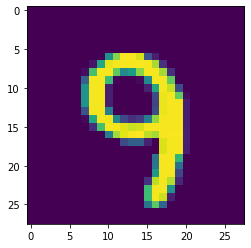

In [77]:
x=df_test.iloc[[27995]]
x=x.to_numpy()
x=x.reshape((28, 28))
from matplotlib import pyplot as plt
plt.imshow(x, interpolation='nearest')
plt.show()